In [1]:
from __future__ import print_function
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
# from statsmodels.compat import urlopen
import statsmodels.formula.api as smf
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
np.set_printoptions(precision=4, suppress=True)
pd.set_option("display.width", 100)

### Question1

In [2]:
df = pd.read_excel('us_macro_quarterly.xlsx')

xdata=df.loc[:,['JAPAN_IP', 'GS10', 'GS1', 'TB3MS', 'UNRATE', 'EXUSUK']].values
ydata=df.loc[:,'PCECTPI'].values
xdata = sm.add_constant(xdata) # adding a constant

# Fit all the data
model = sm.OLS(ydata, xdata).fit()
predictions = model.predict(xdata) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     766.5
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          3.40e-141
Time:                        18:55:49   Log-Likelihood:                -716.96
No. Observations:                 220   AIC:                             1448.
Df Residuals:                     213   BIC:                             1472.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8404      7.586      2.615      0.0

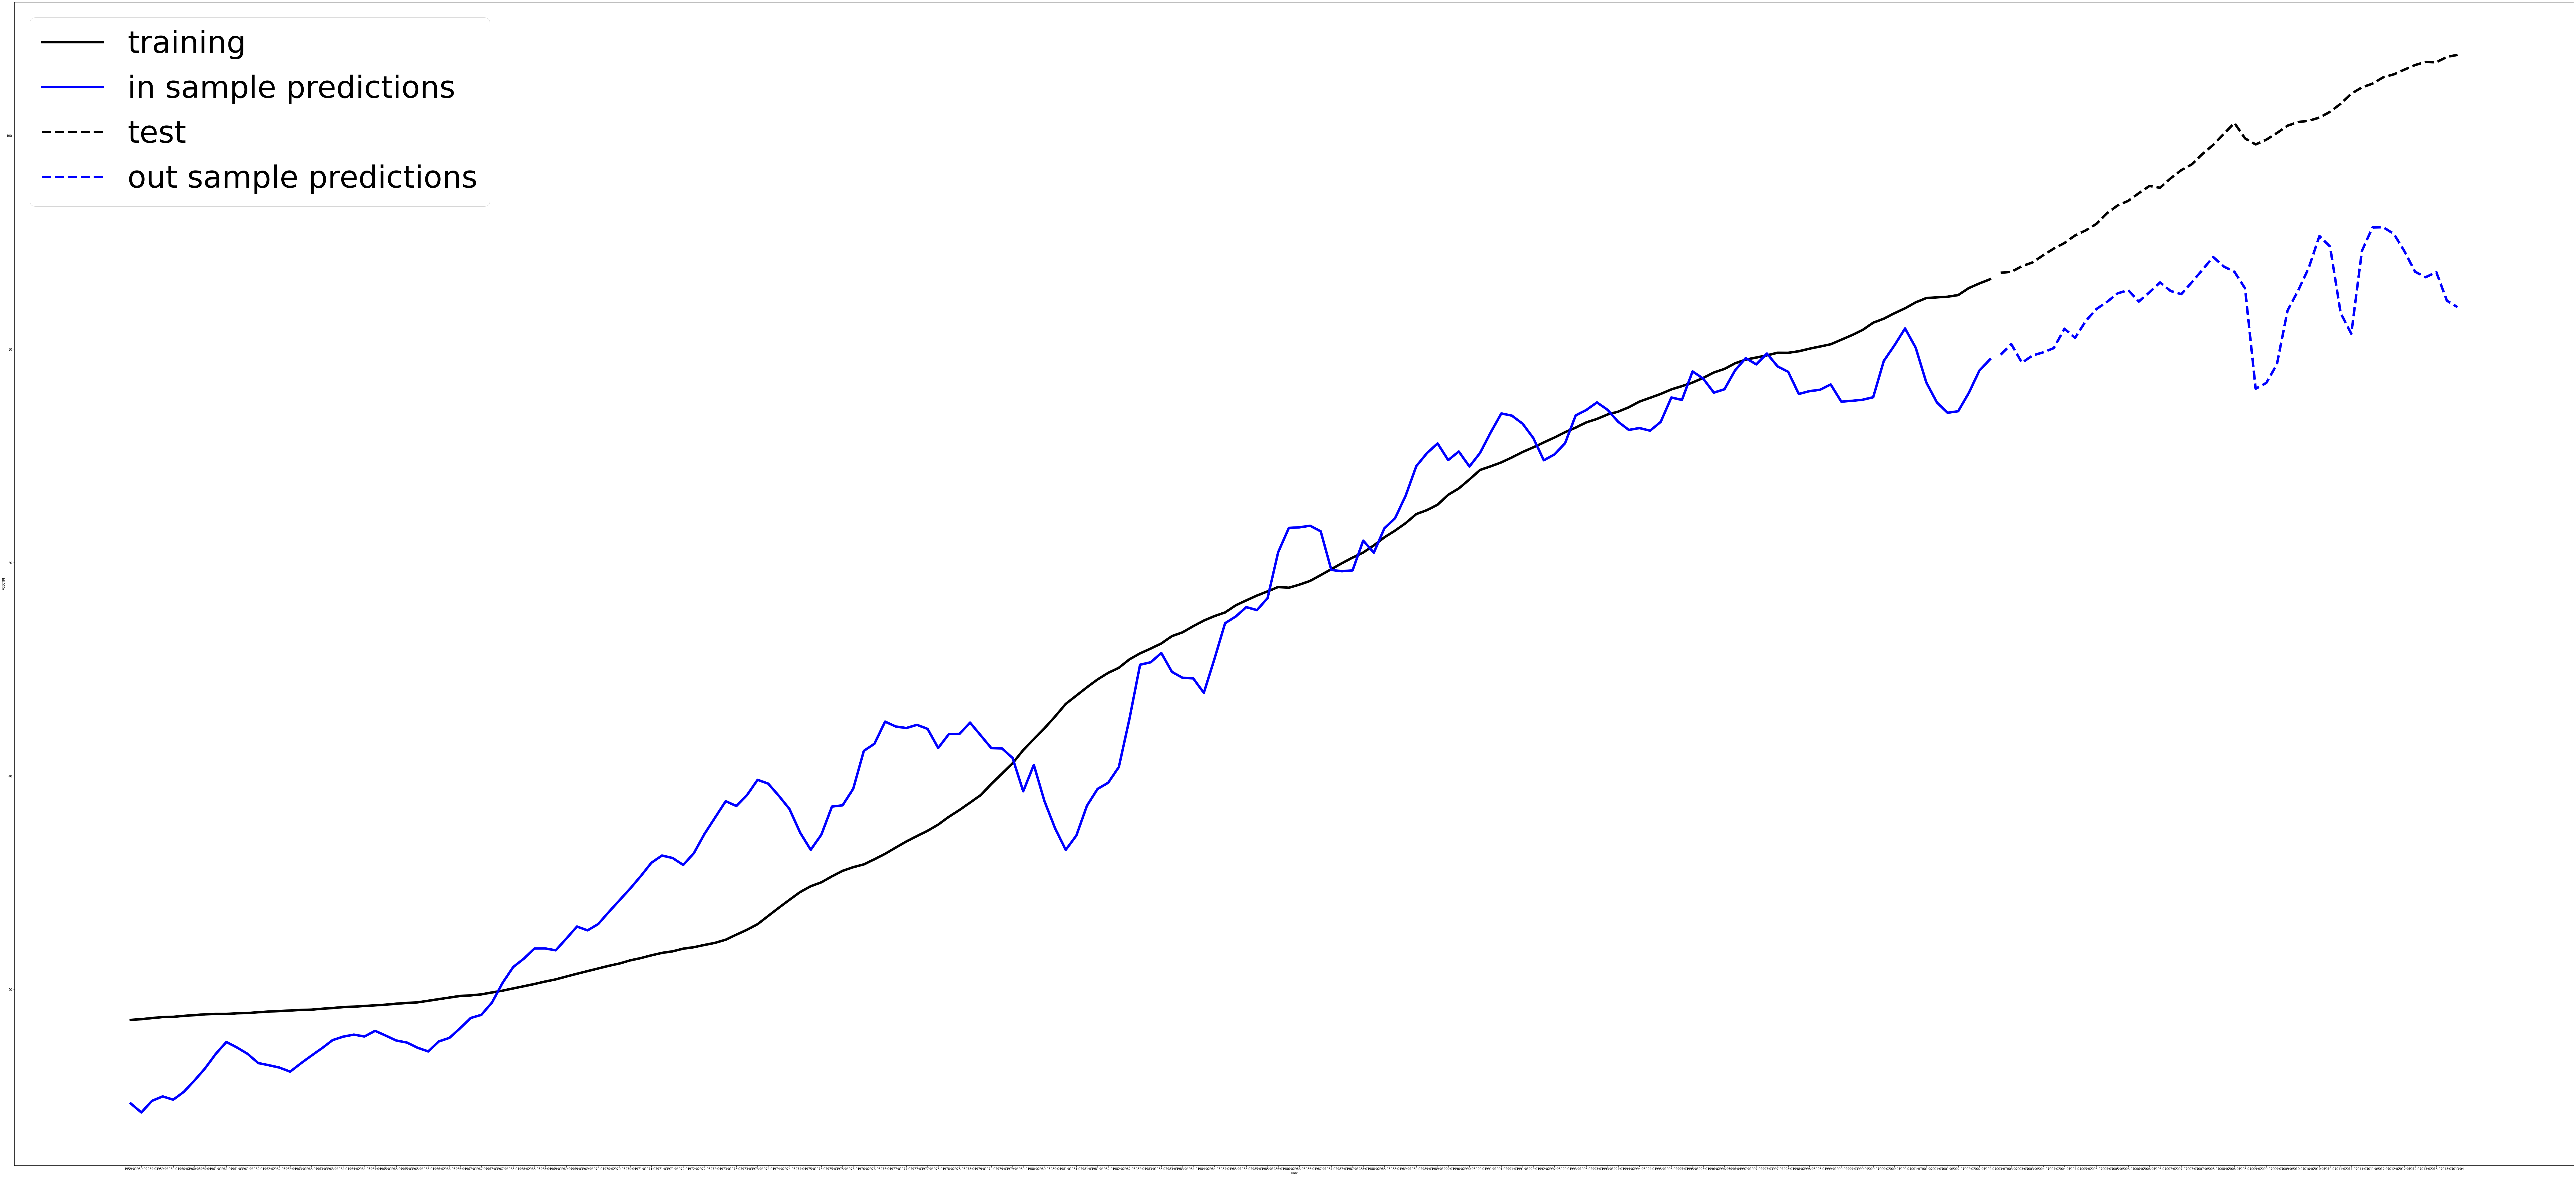

In [32]:

# Train test split with 80/20 with last 20% data as the test when order is needed
X_train = xdata[0:176]; X_test = xdata[176:]
y_train = ydata[0:176]; Y_test = ydata[176:]

model = sm.OLS(y_train,X_train).fit()

#In sample predictions
in_sample_predictions = model.predict(X_train) 

#Out of sample predictions
out_sample_predictions = model.predict(X_test)

fig = plt.figure(figsize=(150,70))
ax = plt.subplot()
ax.plot(df.loc[0:len(y_train)-1,'Date'],y_train,'k',linewidth=8)
ax.plot(df.loc[0:len(y_train)-1,'Date'],in_sample_predictions,'b',linewidth=8)
ax.plot(df.loc[len(y_train):,'Date'],Y_test,'k--',linewidth=8)
ax.plot(df.loc[len(y_train):,'Date'],out_sample_predictions,'b--',linewidth=8)
ax.set_xlabel('Time');ax.set_ylabel('PCECTPI'); 
ax.legend(['training','in sample predictions','test','out sample predictions'],fontsize=100)
plt.show()

In [5]:
# Manually computing F-statistic
# Comparing with the intercept only model based on Null Hypothesis
print(anova_lm(sm.OLS(ydata, np.ones(len(ydata))*ydata.mean()).fit(),sm.OLS(ydata,xdata).fit()))

# Comparing with a less complex model
print(anova_lm(sm.OLS(ydata, df.loc[:,['JAPAN_IP', 'UNRATE', 'EXUSUK']]).fit(),sm.OLS(ydata,xdata).fit(), typ=1))

# Comparing with itself
print(anova_lm(sm.OLS(ydata, xdata).fit(),sm.OLS(ydata,xdata).fit(), typ=1))

# OLS related code block ends here

   df_resid            ssr  df_diff        ss_diff          F         Pr(>F)
0     219.0  197043.064310      0.0            NaN        NaN            NaN
1     213.0    8722.021811      6.0  188321.042498  766.49625  3.402699e-141
   df_resid           ssr  df_diff       ss_diff          F        Pr(>F)
0     217.0  30492.502795      0.0           NaN        NaN           NaN
1     213.0   8722.021811      4.0  21770.480983  132.91392  9.905244e-57
   df_resid          ssr  df_diff  ss_diff   F  Pr(>F)
0     213.0  8722.021811      0.0      NaN NaN     NaN
1     213.0  8722.021811     -0.0     -0.0 NaN     NaN


### Question2

In [33]:
df = pd.read_csv('chip_dataset.csv')
xdata=df.loc[:,['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)']].values
ydata=df.loc[:,'FP32 GFLOPS_Target'].values
xdata = sm.add_constant(xdata) # adding a constant

# Fit all the data
model = sm.OLS(ydata, xdata).fit()
predictions = model.predict(xdata) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     1210.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:38:18   Log-Likelihood:                -14449.
No. Observations:                1610   AIC:                         2.891e+04
Df Residuals:                    1604   BIC:                         2.894e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2686.9596    254.004    -10.578      0.0

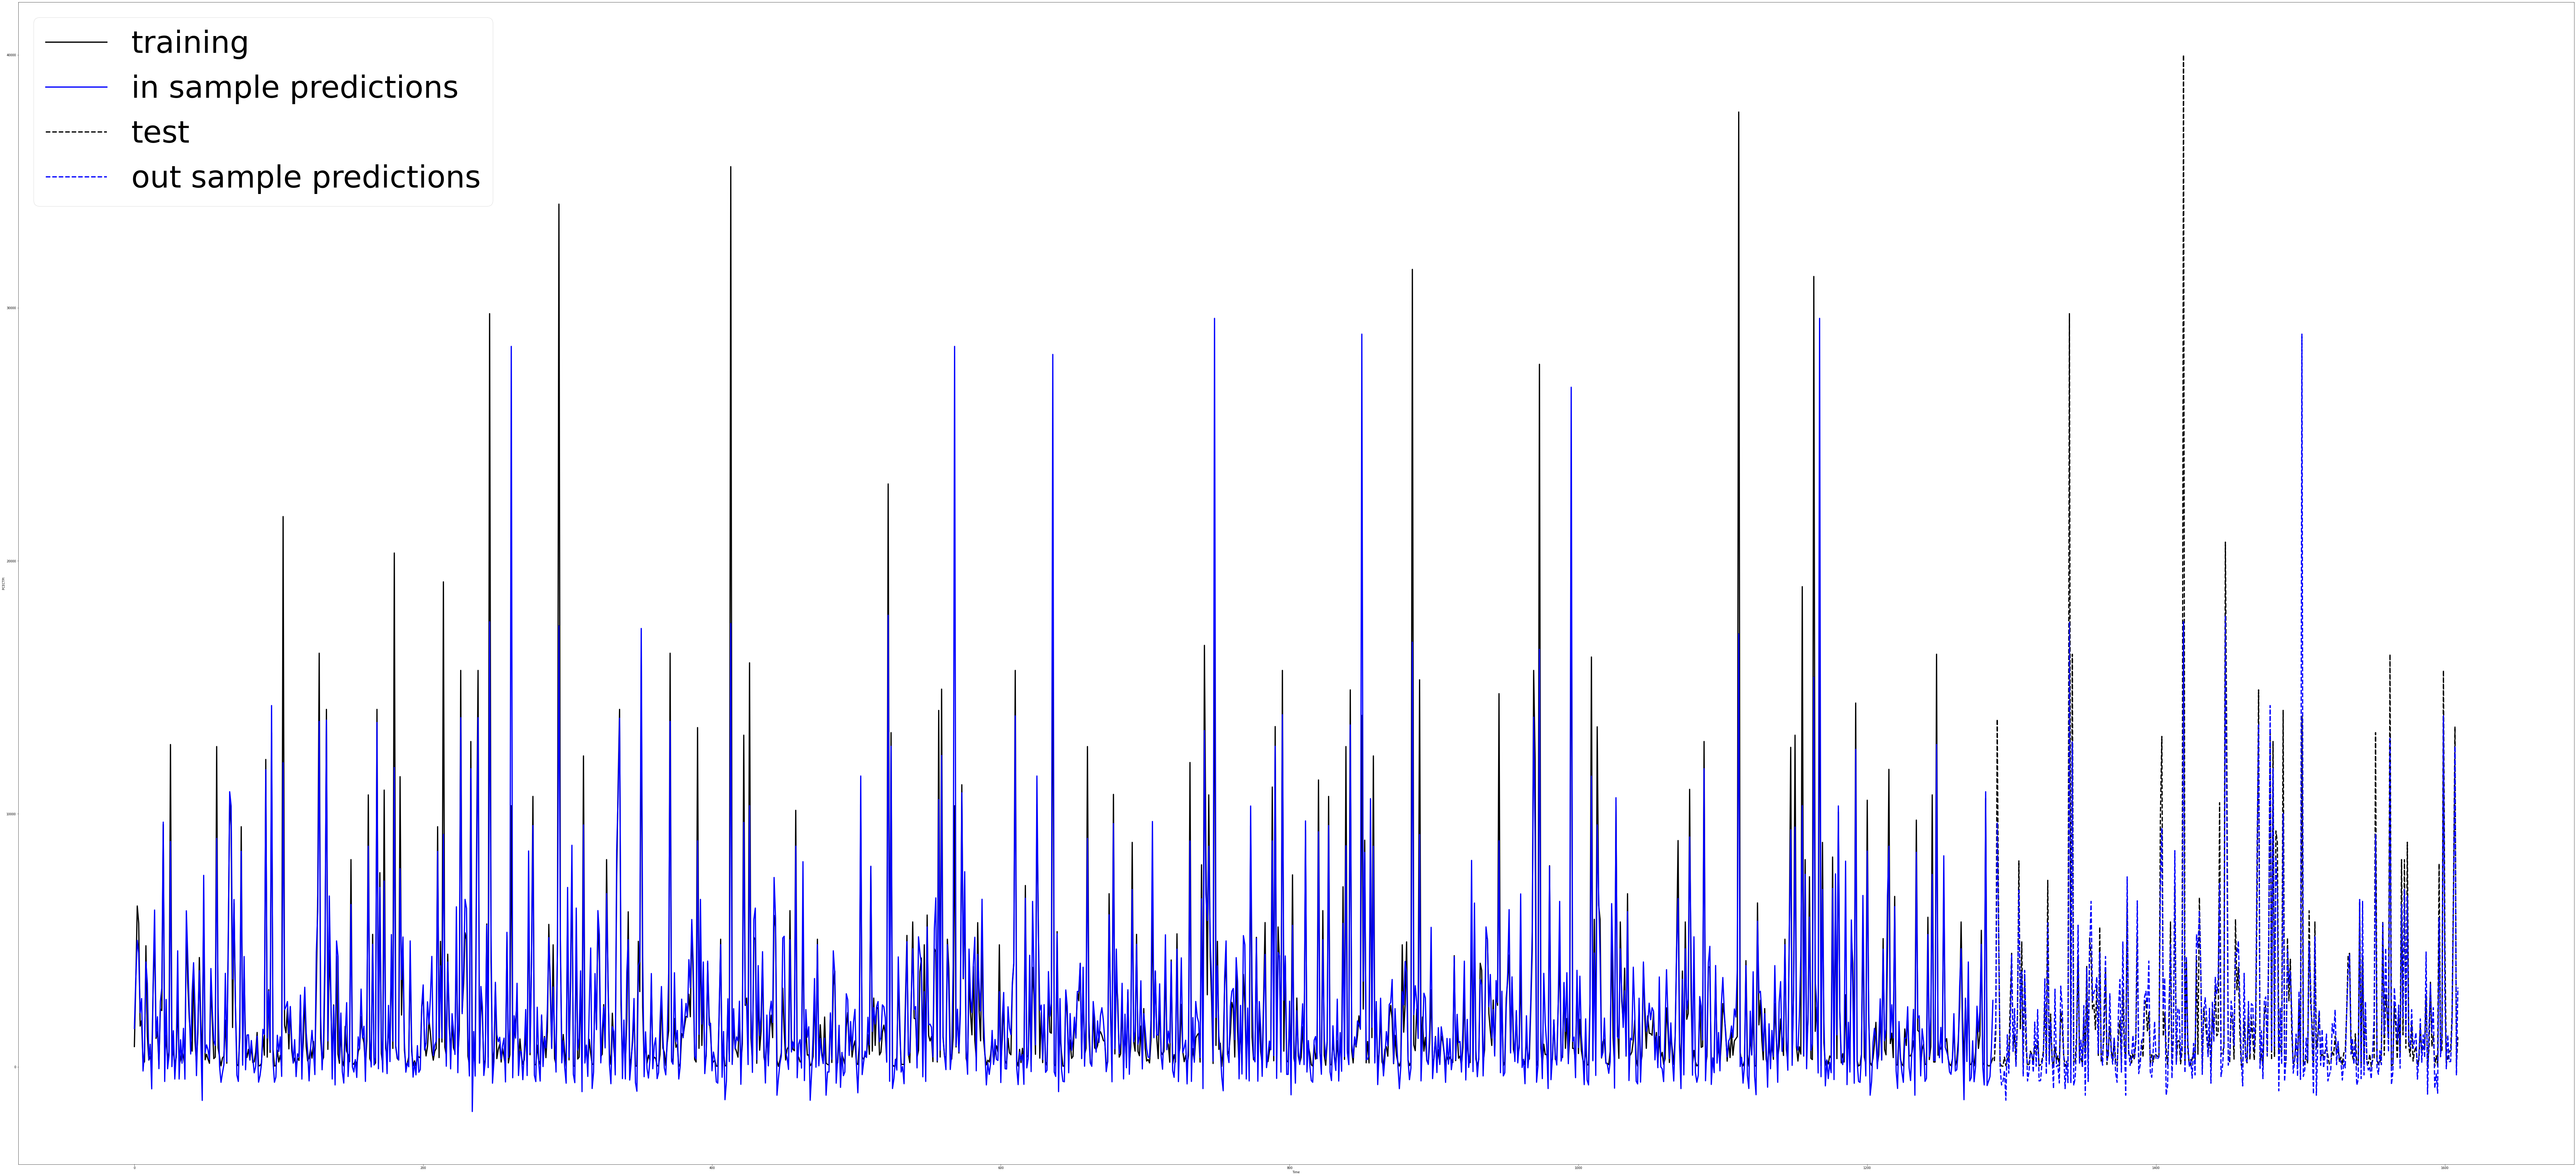

In [37]:
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.20,random_state=42)


model = sm.OLS(y_train,X_train).fit()

#In sample predictions
in_sample_predictions = model.predict(X_train)

#Out of sample predictions
out_sample_predictions = model.predict(X_test)

fig = plt.figure(figsize=(150,70))
ax = plt.subplot()
ax.plot(range(0,len(y_train)),y_train,'k',linewidth=4)
ax.plot(range(0,len(y_train)),in_sample_predictions,'b',linewidth=4)
ax.plot(range(len(y_train), len(y_train) + len(y_test)),y_test,'k--',linewidth=4)
ax.plot(range(len(y_train), len(y_train) + len(y_test)),out_sample_predictions,'b--',linewidth=4)
ax.set_xlabel('Time');ax.set_ylabel('PCECTPI'); 
ax.legend(['training','in sample predictions','test','out sample predictions'],fontsize=100)
plt.show()

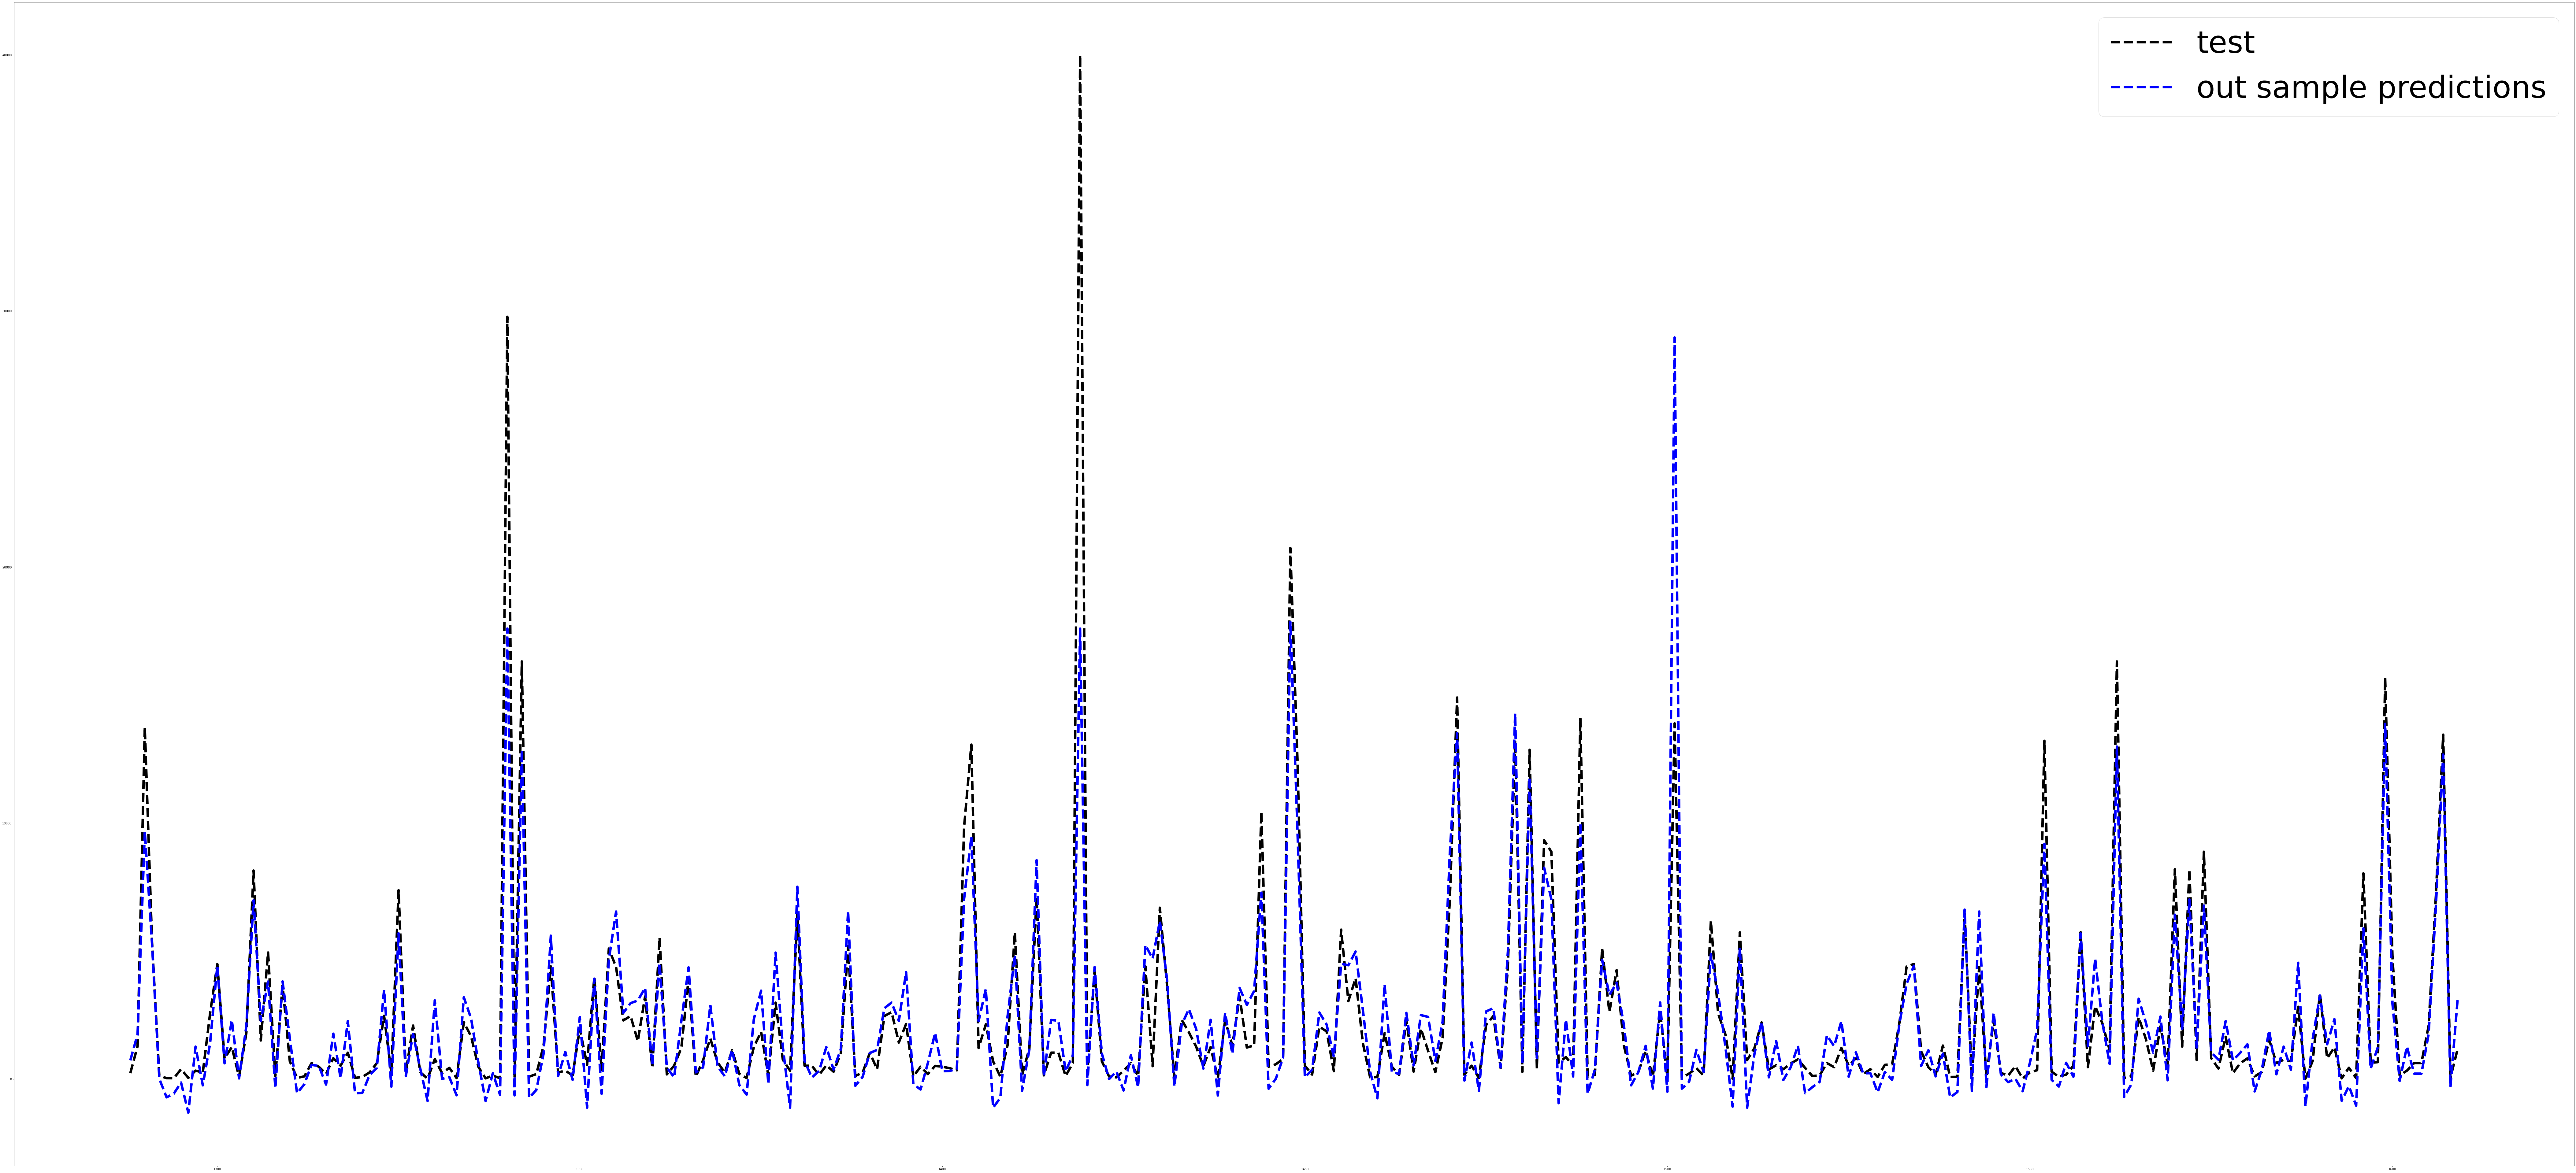

In [40]:
fig = plt.figure(figsize=(150,70))
ax = plt.subplot()
ax.plot(range(len(y_train), len(y_train) + len(y_test)),y_test,'k--',linewidth=8)
ax.plot(range(len(y_train), len(y_train) + len(y_test)),out_sample_predictions,'b--',linewidth=8)
ax.legend(['test','out sample predictions'],fontsize=100)
plt.show()

In [25]:
# Manually computing F-statistic
# Comparing with the intercept only model based on Null Hypothesis
print(anova_lm(sm.OLS(ydata, np.ones(len(ydata))*ydata.mean()).fit(),sm.OLS(ydata,xdata).fit()))

# Comparing with a less complex model
print(anova_lm(sm.OLS(ydata, df.loc[:,['TDP (W)', 'Die Size (mm^2)', 'Transistors (million)']]).fit(),sm.OLS(ydata,xdata).fit(), typ=1))

# Comparing with itself
print(anova_lm(sm.OLS(ydata, xdata).fit(),sm.OLS(ydata,xdata).fit(), typ=1))

   df_resid           ssr  df_diff       ss_diff            F  Pr(>F)
0    1609.0  2.806695e+10      0.0           NaN          NaN     NaN
1    1604.0  5.880445e+09      5.0  2.218651e+10  1210.355874     0.0
   df_resid           ssr  df_diff       ss_diff          F        Pr(>F)
0    1607.0  6.942141e+09      0.0           NaN        NaN           NaN
1    1604.0  5.880445e+09      3.0  1.061696e+09  96.532347  1.939814e-57
   df_resid           ssr  df_diff  ss_diff   F  Pr(>F)
0    1604.0  5.880445e+09      0.0      NaN NaN     NaN
1    1604.0  5.880445e+09     -0.0     -0.0 NaN     NaN


### Question3

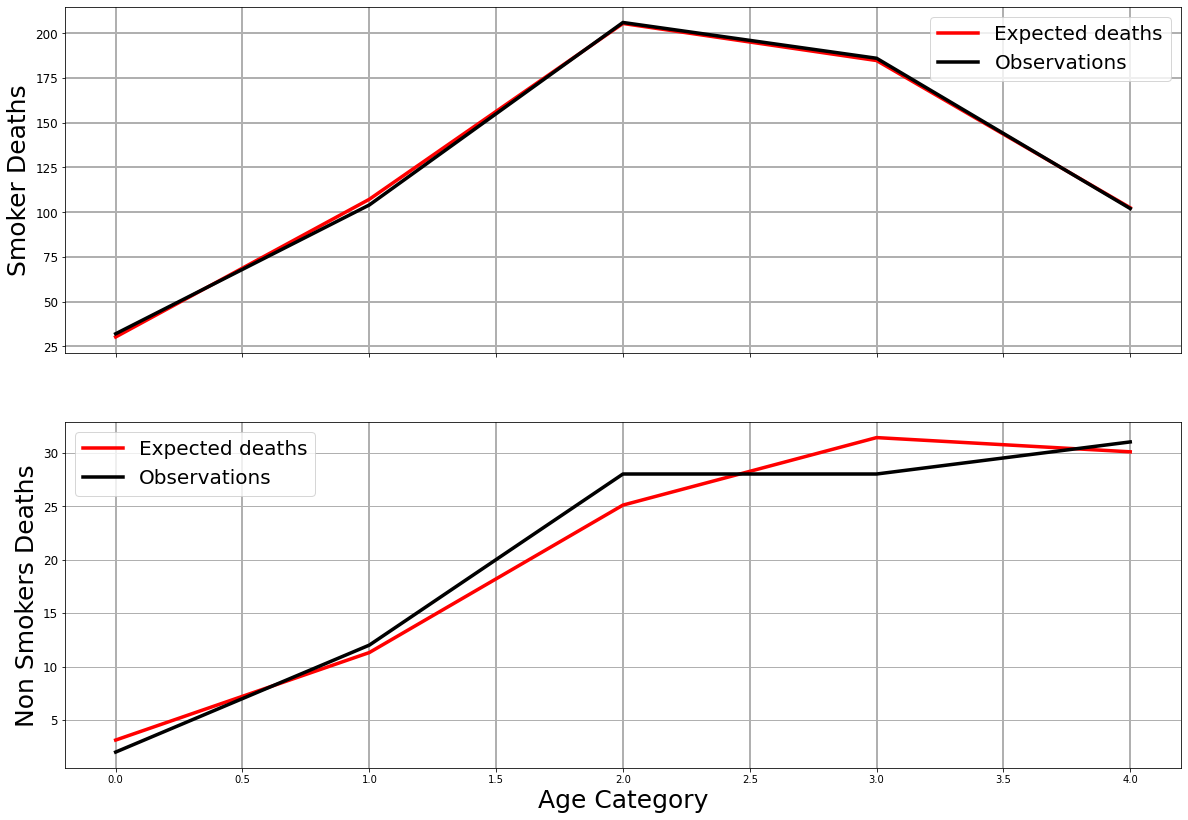

In [26]:
# GLM using Poisson Regression
# Smokers Age Poisson Regression discussed in the class
ds = pd.read_excel('Smokers_Age.xlsx')
ds['PersonYears'] = np.log(ds['PersonYears'])
X = ds.loc[:,['Agecat','Smoke','Agecatsq','Smokeage','PersonYears']].values.tolist()
y = ds.Deaths.values.tolist()
# poisson_results = sm.GLM(y, X, family=sm.families.Poisson()).fit()
poisson_results = smf.glm('Deaths ~ Agecat + Smoke + Agecatsq + Smokeage + PersonYears', data = ds, family=sm.families.Poisson()).fit()

# y_avg = poisson_results.predict(X)
y_avg = poisson_results.predict()

fig = plt.figure(figsize=(20, 14))
ax1 = plt.subplot(211)
plt.plot(y_avg[0:5],'r-',linewidth=3.5)
plt.plot(y[0:5],'k',linewidth=3.5)
plt.ylabel('Smoker Deaths',fontsize=25)
plt.tick_params('x', labelbottom=False)
plt.yticks(fontsize=12)
ax1.xaxis.grid(linewidth=2)
ax1.yaxis.grid(linewidth=2)
ax1.legend(['Expected deaths','Observations'],fontsize=20)
plt.grid(True)

ax2 = plt.subplot(212)
plt.plot(y_avg[5:10],'r-',linewidth=3.5)
plt.plot(y[5:10],'k',linewidth=3.5)
plt.ylabel('Non Smokers Deaths',fontsize=25)
plt.xlabel('Age Category',fontsize=25)
plt.tick_params('x', labelbottom=True)
plt.yticks(fontsize=12)
ax2.xaxis.grid(linewidth=2)
ax2.yaxis.grid(linewidth=1)
ax2.legend(['Expected deaths','Observations'],fontsize=20)
# plt.savefig('Smokers_Poisson_Regression.png')
plt.show()

with open('Smokers_Regression_Summary.txt', 'w') as fh:
    fh.write(poisson_results.summary().as_text())


In [28]:
poisson_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Deaths   No. Observations:                   10
Model:                            GLM   Df Residuals:                        4
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28.260
Date:                Mon, 27 Feb 2023   Deviance:                       1.4517
Time:                        18:37:20   Pearson chi2:                     1.39
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -8.7447      4.803     -1.821      0.069     -18.158       0.669
Agecat          2.3927      0.213     11.250      0.000       1.976       2.810
Smoke           1.7785      0.877      2.029      0.042       0.060       3.497
Agecatsq       -0.2210      0.061     -3.614      0.000      -0.341      -0.101
Smokeage       -0.3129      0.099     -3.150      0.002      -0.508      -0.118
PersonYears     0.7837      0.506      1.550      0.121      -0.207       1.775
===============================================================================
"""